In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
playst=pd.read_csv('googleplaystore.csv')

In [3]:
playst.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
playst.shape

(10841, 13)

In [5]:
playst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playst.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
playst_mb=playst.copy()

In [8]:
#function to convert size into Bytes by popping 'M' and 'K' from the string size values.
#converts to float data-type. 
def clean_size(x):
    if x.endswith('M'):
        x=float(x[:-1])*1000000
    elif x.endswith('k'):
        x=float(x[:-1])*1000
    else:
        x=np.nan
    return x

#function to convert size into MegaBytes
#converts to float data-type
def clean_size_mb(x):
    if x.endswith('M'):
        x=float(x[:-1])
    elif x.endswith('k'):
        x=float(x[:-1])/1000
    else:
        x=np.nan
    return x

#pop ',' from installs string and remove '+' from the end
#convert to float
def clean_install(x):
    if len(x)>1:
        x=x[:-1]
        x=x.replace(',','')
    x=float(x)
    return x

#pop '$' sign at the beginning and convert to float
def clean_price(x):
    if x.startswith('$'):
        return x[1:]
    else:
        return x

playst['Size']=playst['Size'].apply(clean_size)
playst['Size'].fillna(playst.groupby('Category')['Size'].transform('mean'),inplace = True)
playst=playst[playst['Size'].notna()]
#playst.head()

playst_mb['Size']=playst_mb['Size'].apply(clean_size_mb)
playst_mb['Size'].fillna(playst_mb.groupby('Category')['Size'].transform('mean'),inplace = True)
playst_mb=playst_mb[playst_mb['Size'].notna()]


playst['Installs']=playst['Installs'].apply(clean_install)
playst_mb['Installs']=playst_mb['Installs'].apply(clean_install)
#playst.info()

playst['Price']=playst['Price'].apply(clean_price).astype(float)
playst_mb['Price']=playst_mb['Price'].apply(clean_price).astype(float)

playst['Reviews']=playst['Reviews'].astype(float)
playst_mb['Reviews']=playst_mb['Reviews'].astype(float)
#playst.info()

playst=playst[playst['Rating'].notna()]
playst_mb=playst_mb[playst_mb['Rating'].notna()]

In [9]:
playst.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,2.235811e+07,1.789744e+07,0.960928
std,0.515219,3.144042e+06,2.165482e+07,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6.600000e+06,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,1.600000e+07,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,2.900000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


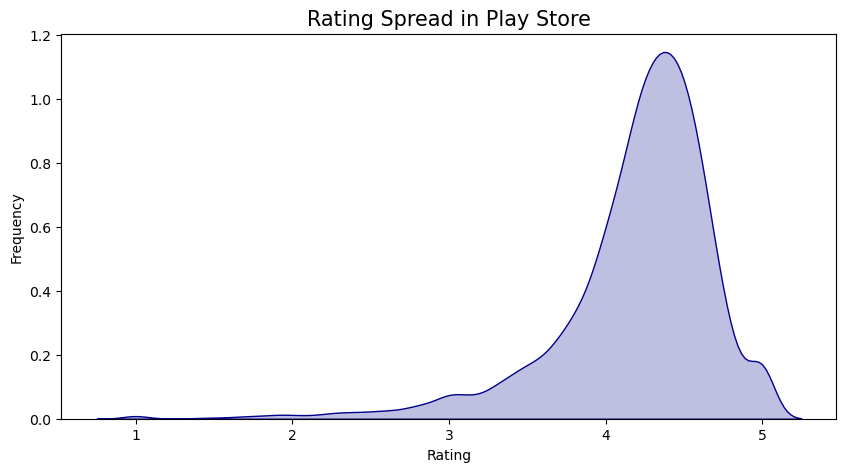

In [10]:
#rating distibution
plt.figure(figsize=(10,5))
fig = sns.kdeplot(playst['Rating'], color="darkblue", shade = True)
fig.set_xlabel("Rating",size=10)
fig.set_ylabel("Frequency",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Rating Spread in Play Store',size = 15)
plt.show()

In [11]:
print('Avg. Size[MB]: ',playst_mb['Size'].mean())

Avg. Size[MB]:  22.35810526229544


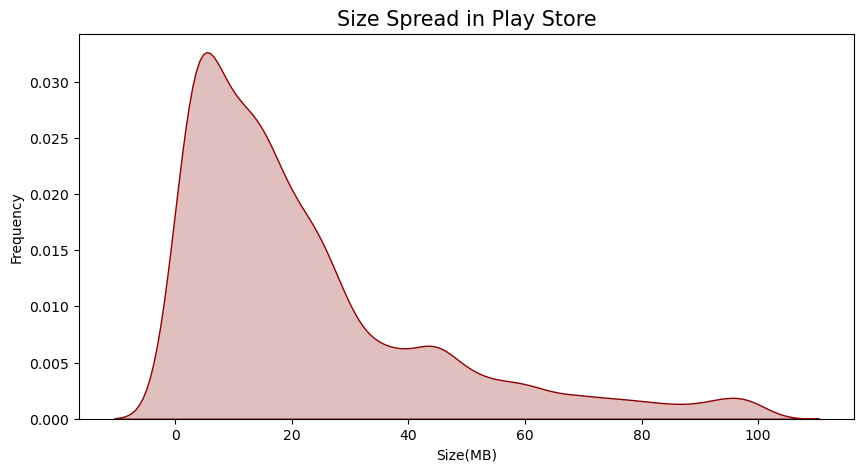

In [12]:
plt.figure(figsize=(10,5))
fig = sns.kdeplot(playst_mb['Size'], color="darkred", shade = True)
fig.set_xlabel("Size(MB)",size=10)
fig.set_ylabel("Frequency",size=10)
plt.title('Size Spread in Play Store',size = 15)
plt.show()

In [13]:
print('Avg.Reviews: ',playst['Reviews'].mean())

Avg.Reviews:  514049.8365364083


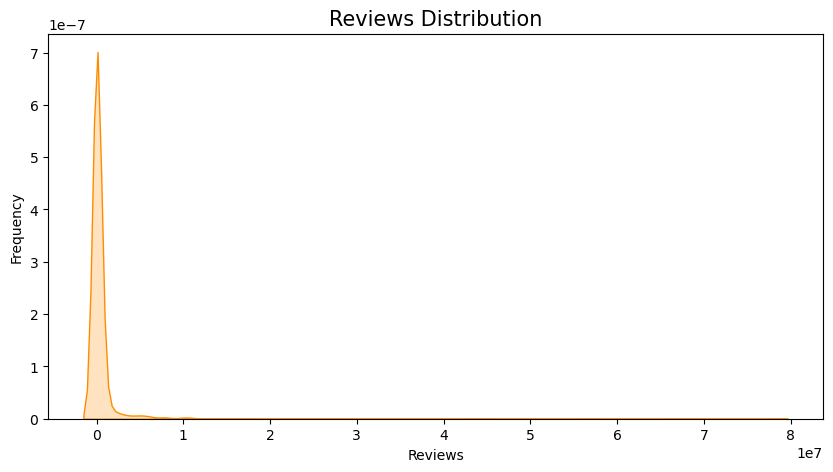

In [14]:
plt.figure(figsize=(10,5))
fig = sns.kdeplot(playst['Reviews'], color="darkorange", shade = True)
fig.set_xlabel("Reviews",size=10)
fig.set_ylabel("Frequency",size=10)
plt.title('Reviews Distribution',size = 15)
plt.show()

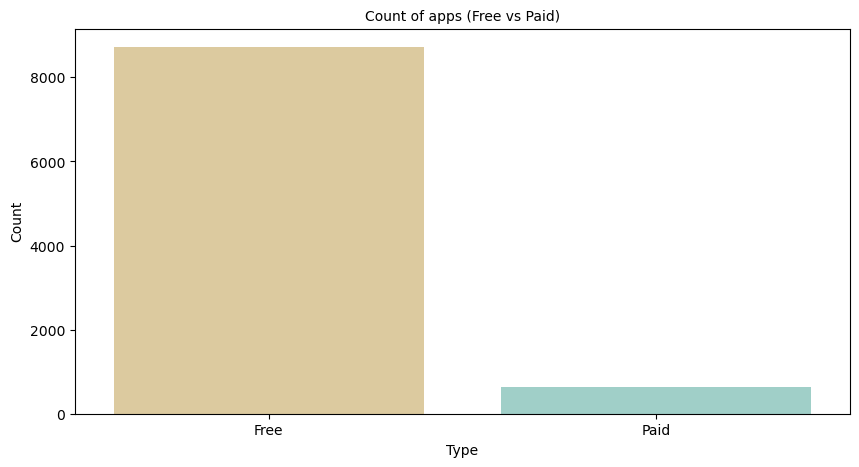

In [15]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=playst_mb['Type'],palette='BrBG')
fig.set_xlabel("Type",size=10)
fig.set_ylabel("Count",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Count of apps (Free vs Paid)',size = 10)
plt.show()

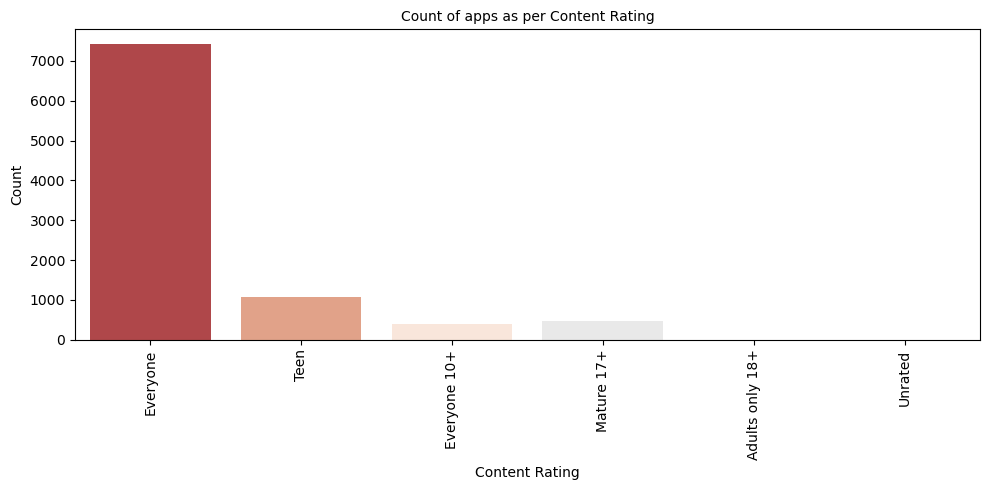

In [16]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=playst['Content Rating'],palette='RdGy')
fig.set_xlabel("Content Rating",size=10)
fig.set_ylabel("Count",size=10)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Count of apps as per Content Rating',size = 10)
plt.tight_layout()

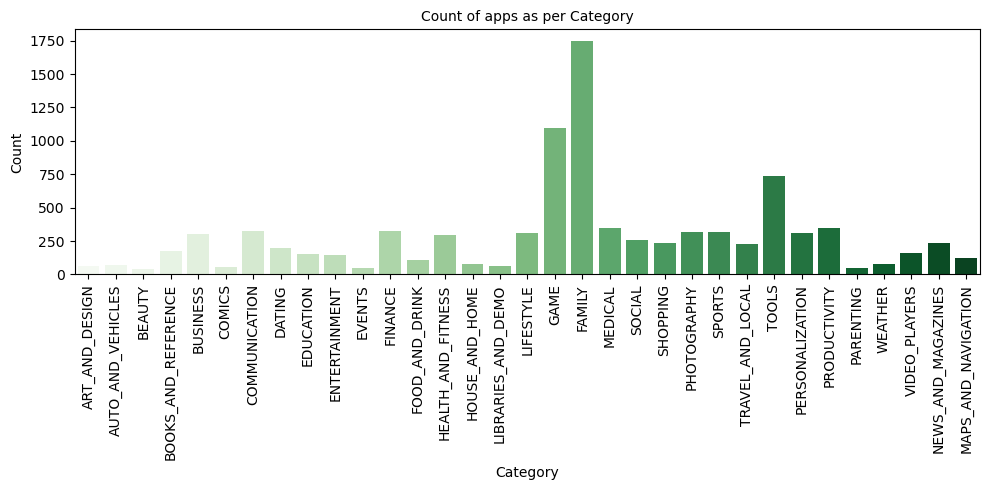

In [17]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=playst['Category'],palette='Greens')
fig.set_xlabel("Category",size=10)
fig.set_ylabel("Count",size=10)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Count of apps as per Category',size = 10)
plt.tight_layout()

In [18]:
rat_catdf=playst.groupby('Category').describe().reset_index()

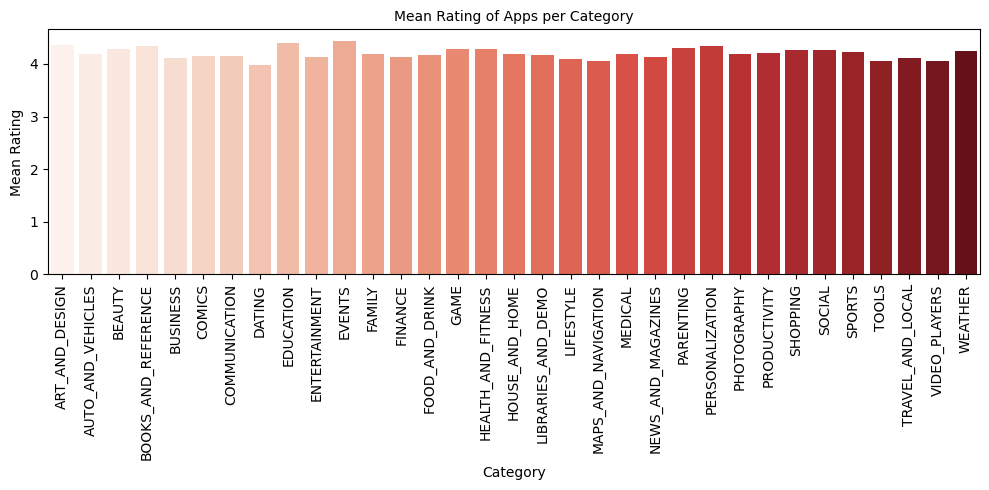

In [19]:
plt.figure(figsize=(10,5))
fig=sns.barplot(x=rat_catdf['Category'],y=rat_catdf['Rating']['mean'],palette='Reds')
fig.set_xlabel("Category",size=10)
fig.set_ylabel("Mean Rating",size=10)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Mean Rating of Apps per Category',size = 10)
plt.tight_layout()

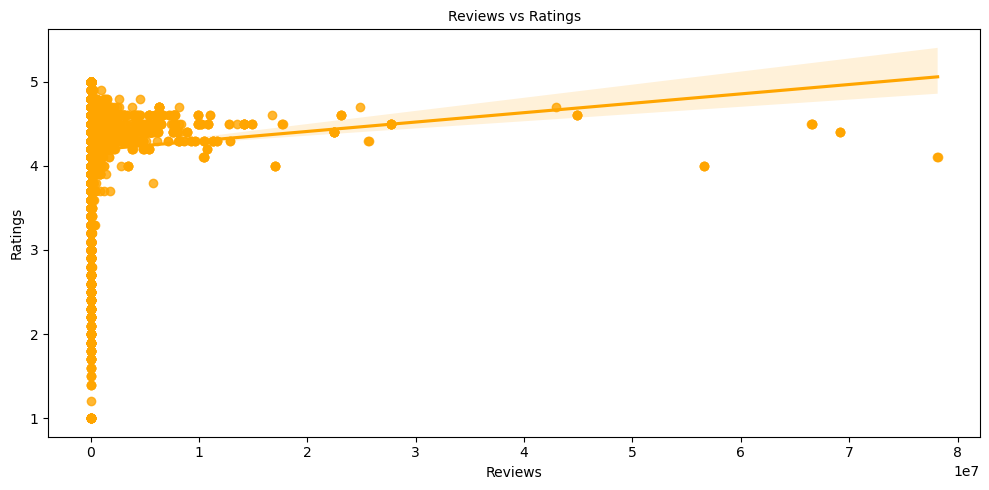

In [20]:
plt.figure(figsize=(10,5))
fig=sns.regplot(x='Reviews',y='Rating',data=playst,color='orange')
fig.set_xlabel("Reviews",size=10)
fig.set_ylabel("Ratings",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings',size = 10)
plt.tight_layout()

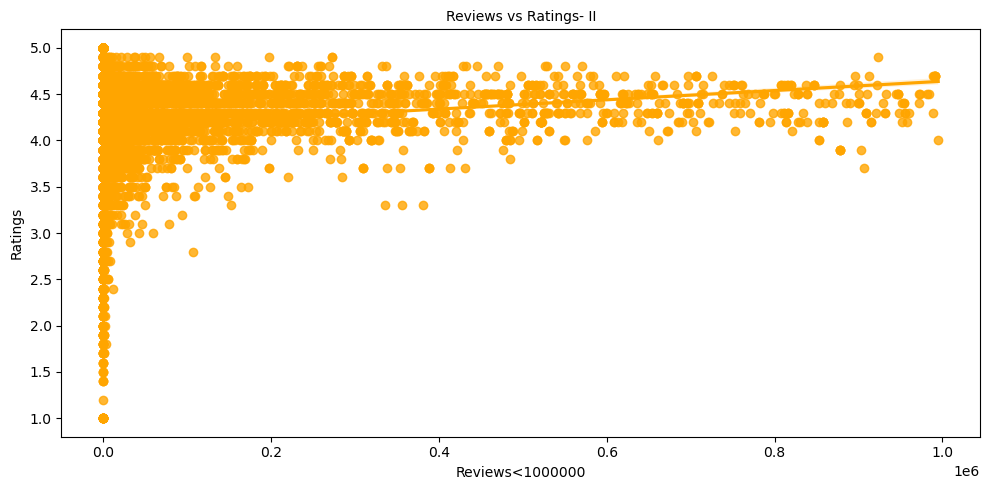

In [21]:
plt.figure(figsize=(10,5))
fig=sns.regplot(x='Reviews',y='Rating',data=playst[playst['Reviews']<1000000],color='orange')
fig.set_xlabel("Reviews<1000000",size=10)
fig.set_ylabel("Ratings",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings- II',size = 10)
plt.tight_layout()

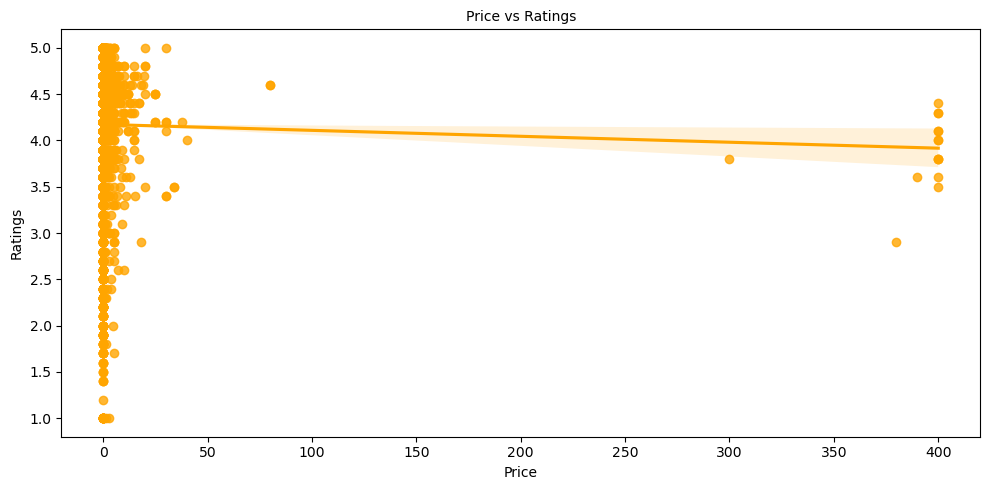

In [22]:
plt.figure(figsize=(10,5))
fig=sns.regplot(x='Price',y='Rating',data=playst[playst['Reviews']<1000000],color='orange')
fig.set_xlabel("Price",size=10)
fig.set_ylabel("Ratings",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Price vs Ratings',size = 10)
plt.tight_layout()

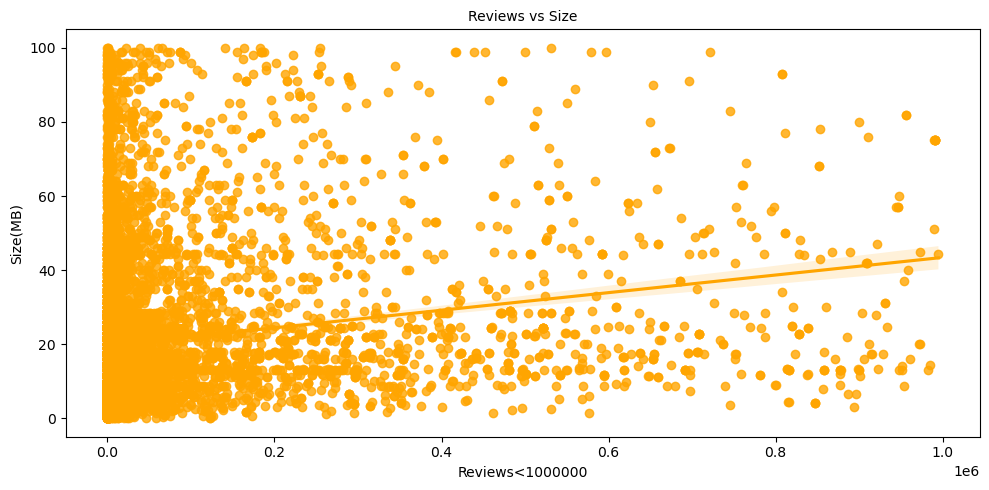

In [23]:
plt.figure(figsize=(10,5))
fig=sns.regplot(x='Reviews',y='Size',data=playst_mb[playst_mb['Reviews']<1000000],color='orange')
fig.set_ylabel("Size(MB)",size=10)
fig.set_xlabel("Reviews<1000000",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Size',size = 10)
plt.tight_layout()

<Figure size 1200x1000 with 0 Axes>

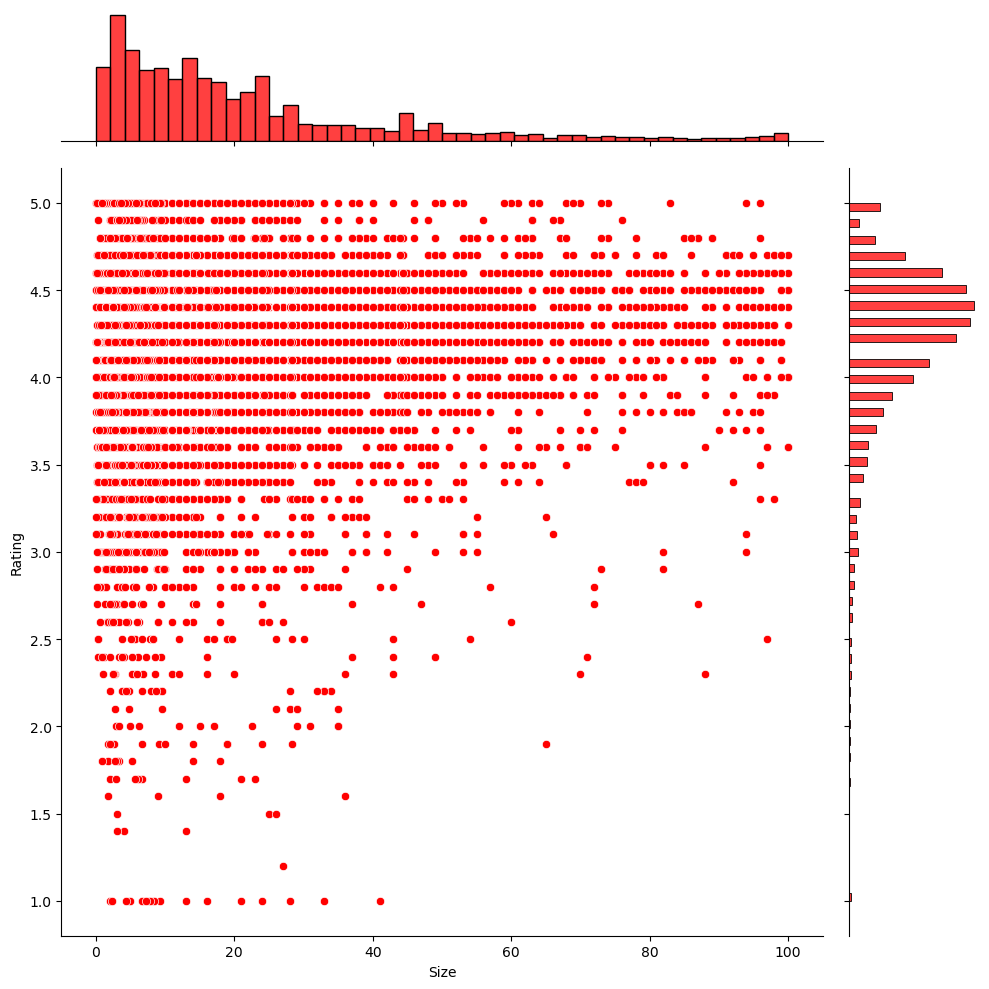

In [24]:
plt.figure(figsize=(12,10))
fig=sns.jointplot(x='Size',y='Rating',data=playst_mb,color='red',size=10)
plt.show()

In [25]:
#Dropping columns that do not contribute numerically to the Regression Model
playst.drop(columns=['Current Ver','Android Ver','App','Last Updated'],inplace=True)
#playst.isnull().sum()

In [26]:
#encoding categorical values
playst=pd.get_dummies(playst,columns=['Type','Content Rating'],drop_first=True)
#playst.head()

In [27]:
#Splitting our mathematical feature columns and assigning it to 'X'
X=playst.drop(columns=['Category','Rating','Genres'],axis=1)
#Splitting our target variable 'Rating' and assigning it to 'y'
y=playst['Rating']

In [28]:
#We are splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
#scaling the training data(fitting the parameters and transforming the values)
X_train=scaler.fit_transform(X_train)
#transforming the test data.We avoid fitting the values to prevent data leakage!
X_test=scaler.transform(X_test)

In [30]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf=RandomForestRegressor(n_estimators = 10, random_state = 42)
#fitting without hyperparamter tuning
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [32]:
#predictions
pred_rf=rf.predict(X_test)

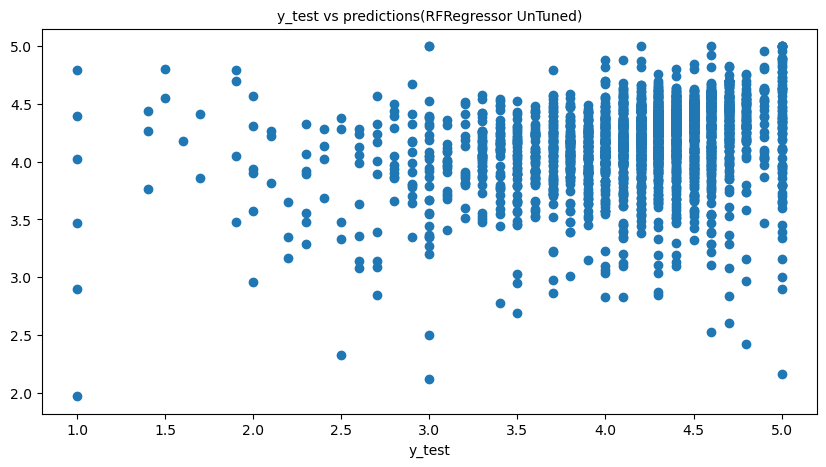

In [33]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('y_test vs predictions(RFRegressor UnTuned)',size=10)
ax.set_xlabel('y_test',size=10)
ax.scatter(y_test,pred_rf)

Text(0.5, 1.0, 'Residual Analysis RF(UnTuned)')

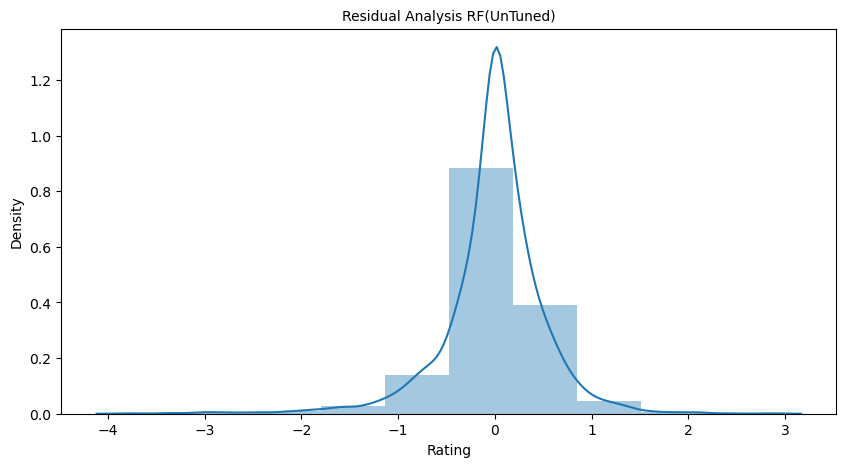

In [34]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot((y_test-pred_rf),bins=10,ax=ax)
ax.set_title('Residual Analysis RF(UnTuned)', fontsize = 10)

In [35]:
from sklearn import metrics
print('Mean Absolute Error\tMAE_RF:',  metrics.mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error\tMSE_RF:',  metrics.mean_squared_error(y_test, pred_rf))
print('Root Mean Squared Error\tRMSE_RF:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

Mean Absolute Error	MAE_RF: 0.3429081765802407
Mean Squared Error	MSE_RF: 0.2807337772591006
Root Mean Squared Error	RMSE_RF: 0.5298431628879442


In [36]:
#Accuracy
errors_rf = abs(pred_rf - y_test)
mape_rf = 100 * (errors_rf / y_test)
# Calculate and display accuracy
accuracy_rf = 100 - np.mean(mape_rf)

print('Accuracy_RandomForest:', round(accuracy_rf, 2), '%.')

Accuracy_RandomForest: 90.25 %.
